In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import wget
import pandas as pd

### Sunspots dataset

- Sunspots dataset: a monthly record of sunspot numbers from January 1749 to July 2018
- https://www.kaggle.com/datasets/robervalt/sunspots

In [2]:
def plot_series(time, series, colour,format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end],format, label=label,color=colour)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [3]:
#wget.download("https://storage.googleapis.com/tensorflow-1-public/course4/Sunspots.csv")

In [4]:
df = pd.read_csv('Datasets/Sunspots.csv')
print(df.shape)
df.head()

(3235, 3)


,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


(3235,) (3235,)


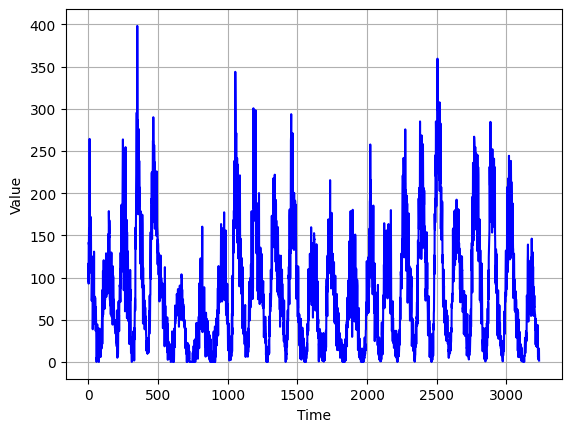

In [5]:
time = df.iloc[:,0].values
series = df.iloc[:,2].values
print(time.shape,series.shape)
plot_series(time, series,'b')

In [6]:
# Take the first 3000 points for training while the rest is for validation
split_idx = 3000
time_y_train = time[0:split_idx]
series_x_train = series[0:split_idx]

time_y_val = time[split_idx:]
series_x_val = series[split_idx:]

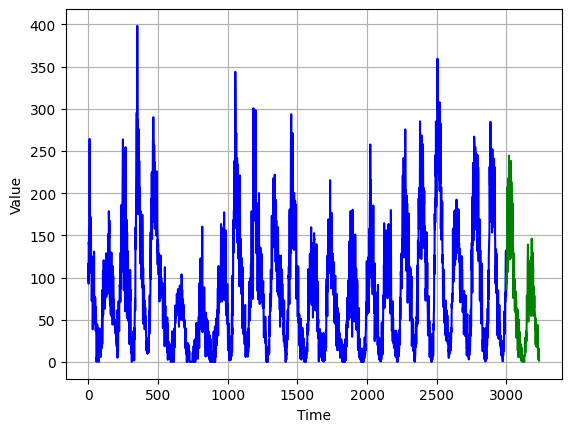

In [7]:
plot_series(time_y_train,series_x_train,'b')
plot_series(time_y_val,series_x_val,'g')

#### Hyperparameters

In [59]:
window_size = 30 #window size is set to 30 points (equal to 2.5 years)
batch_size = 16

In [60]:
def windowing(series,window_size,batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(size=window_size+1,shift=1,drop_remainder=True) #Returns WindowDataset & Iterator returns VariantDataset
    dataset = dataset.flat_map(lambda el : el.batch(window_size+1))  #Flatten windows  by putting its elements in a single batch so that it gives a single dataset -> Returns FlatMapDataset & Iterator returns Tensor
    dataset = dataset.map(lambda el : (el[:-1],el[-1:])) #Returns MapDataset & Iterator returns 2 tensors #el[-1] returns scalar while el[-1:] returns array
    dataset = dataset.shuffle(buffer_size=len(series)+10)
    dataset =dataset.batch(batch_size=batch_size).prefetch(1) #Simply specify the batch size and it will return a batched dataset with that number of windows
    return dataset

train_ds = windowing(series_x_train,window_size=window_size,batch_size=batch_size) #Iterate as for x,y in dataset:
val_ds = windowing(series_x_val,window_size=window_size,batch_size=batch_size)
for x,y in train_ds:
    print(x.numpy().shape,y.numpy().shape)

(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 1)
(16, 30) (16, 

In [61]:
train_ds = train_ds.map(lambda x,y : (tf.expand_dims(x,axis=-1),y))
test_ds = train_ds.map(lambda x,y : (tf.expand_dims(x,axis=-1),y))
for x,y in train_ds:
    print(x.numpy().shape,y.numpy().shape)

(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)
(16, 30, 1) (16, 1)


### Simple Neural Network

In [140]:
ts_simple_nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16,activation='relu',input_shape=[window_size]),
    tf.keras.layers.Dense(units=8,activation='relu'),
    tf.keras.layers.Dense(units=1)
])
ts_simple_nn_model.summary()
ts_simple_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.Huber(),metrics=['mae']) #Huber minimize sensitivity to outliers

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 16)                496       
                                                                 
 dense_55 (Dense)            (None, 8)                 136       
                                                                 
 dense_56 (Dense)            (None, 1)                 9         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [141]:
ts_simple_nn_model_hist = ts_simple_nn_model.fit(train_ds,epochs = 500)

Epoch 1/500
186/186 [==============================] - 1s 1ms/step - loss: 30.8987 - mae: 31.3935
Epoch 2/500
186/186 [==============================] - 1s 1ms/step - loss: 21.2280 - mae: 21.7214
Epoch 3/500
186/186 [==============================] - 1s 2ms/step - loss: 20.0718 - mae: 20.5660
Epoch 4/500
186/186 [==============================] - 1s 2ms/step - loss: 19.3070 - mae: 19.7995
Epoch 5/500
186/186 [==============================] - 1s 1ms/step - loss: 19.2356 - mae: 19.7282
Epoch 6/500
186/186 [==============================] - 1s 1ms/step - loss: 18.3398 - mae: 18.8308
Epoch 7/500
186/186 [==============================] - 0s 1ms/step - loss: 18.0834 - mae: 18.5769
Epoch 8/500
186/186 [==============================] - 0s 1ms/step - loss: 17.8920 - mae: 18.3836
Epoch 9/500
186/186 [==============================] - 0s 1ms/step - loss: 18.1000 - mae: 18.5927
Epoch 10/500
186/186 [==============================] - 0s 1ms/step - loss: 17.8009 - mae: 18.2942
Epoch 11/500
186/18

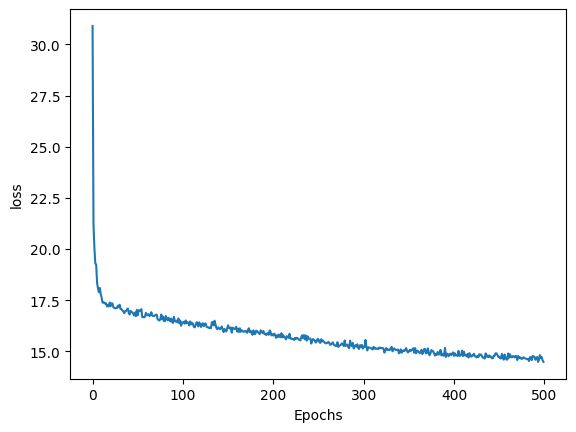

In [142]:
def plot_graphs(model_hist, string):
  plt.plot(model_hist.history[string])
  #plt.plot(model_hist.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  #plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(ts_simple_nn_model_hist, "loss")

In [143]:
predict_ds = tf.data.Dataset.from_tensor_slices(series[split_idx-window_size:])
predict_ds = predict_ds.window(size=window_size+1,shift=1,drop_remainder=True)
predict_ds = predict_ds.flat_map(lambda el : el.batch(window_size+1))
predict_ds = predict_ds.map(lambda el : el[:-1])
predict_ds = predict_ds.batch(batch_size=batch_size).prefetch(1)

In [144]:
ts_simple_nn_model_forecast = ts_simple_nn_model.predict(predict_ds)
ts_simple_nn_model_forecast = ts_simple_nn_model_forecast.reshape(-1)

15/15 [==============================] - 0s 8ms/step


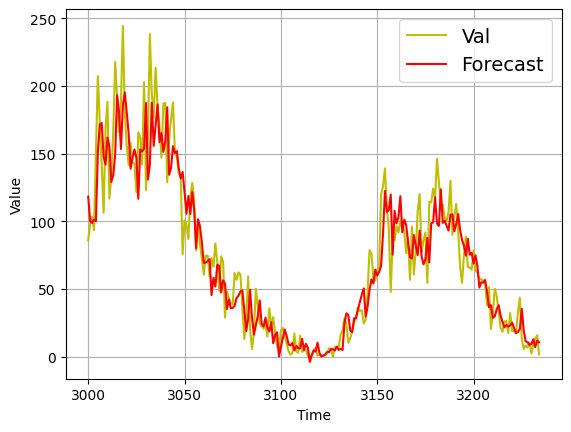

In [145]:
plot_series(time_y_val,series_x_val,colour='y',label='Val')
plot_series(time_y_val,ts_simple_nn_model_forecast,colour='r',label='Forecast')

In [146]:
print(tf.keras.metrics.mean_absolute_error(series_x_val,ts_simple_nn_model_forecast).numpy())

14.912454


### CNN and RNN

In [18]:
ts_cnn_rnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64,kernel_size=3,padding='causal',activation='relu',input_shape=[None,1]),
    #tf.keras.layers.GlobalMaxPooling1D(),

    tf.keras.layers.LSTM(units=64,return_sequences=True),
    tf.keras.layers.LSTM(units=64),

    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=1)
])
ts_cnn_rnn_model.summary()
ts_cnn_rnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.Huber(),metrics=['mae']) #Huber minimize sensitivity to outliers

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 64)          256       
                                                                 
 lstm (LSTM)                 (None, None, 64)          33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 68,929
Trainable params: 68,929
Non-trai

In [19]:
ts_cnn_rnn_model_hist = ts_cnn_rnn_model.fit(train_ds,epochs = 400)

Epoch 1/400
93/93 [==============================] - 7s 30ms/step - loss: 80.7551 - mae: 81.2495
Epoch 2/400
93/93 [==============================] - 3s 26ms/step - loss: 74.7191 - mae: 75.2159
Epoch 3/400
93/93 [==============================] - 3s 27ms/step - loss: 67.1750 - mae: 67.6715
Epoch 4/400
93/93 [==============================] - 3s 26ms/step - loss: 59.7237 - mae: 60.2201
Epoch 5/400
93/93 [==============================] - 3s 34ms/step - loss: 51.8878 - mae: 52.3812
Epoch 6/400
93/93 [==============================] - 4s 43ms/step - loss: 44.4537 - mae: 44.9462
Epoch 7/400
93/93 [==============================] - 5s 45ms/step - loss: 38.3153 - mae: 38.8091
Epoch 8/400
93/93 [==============================] - 3s 33ms/step - loss: 33.5878 - mae: 34.0793
Epoch 9/400
93/93 [==============================] - 3s 31ms/step - loss: 29.9513 - mae: 30.4432
Epoch 10/400
93/93 [==============================] - 4s 37ms/step - loss: 27.1806 - mae: 27.6721
Epoch 11/400
93/93 [=========

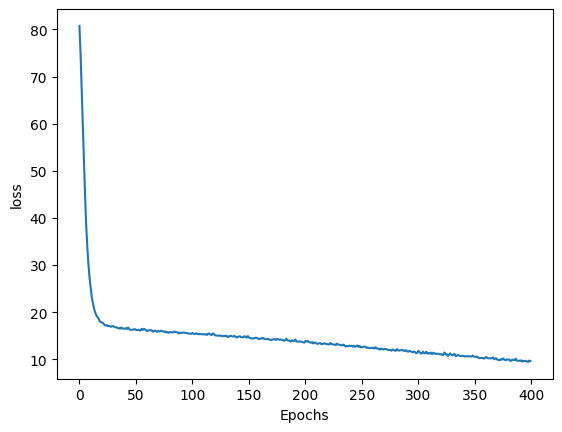

In [26]:
plot_graphs(ts_cnn_rnn_model_hist, "loss")

In [27]:
ts_cnn_rnn_model_forecast = ts_cnn_rnn_model.predict(predict_ds)
ts_cnn_rnn_model_forecast = ts_cnn_rnn_model_forecast.reshape(-1)

8/8 [==============================] - 0s 20ms/step


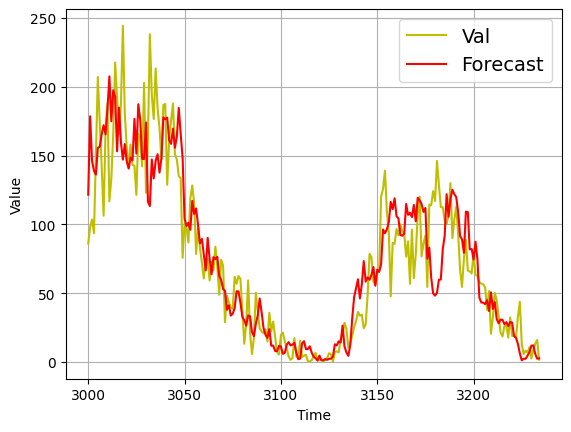

In [28]:
plot_series(time_y_val,series_x_val,colour='y',label='Val')
plot_series(time_y_val,ts_cnn_rnn_model_forecast,colour='r',label='Forecast')

In [29]:
print(tf.keras.metrics.mean_absolute_error(series_x_val,ts_cnn_rnn_model_forecast).numpy())

18.897446
